# Explore here

It's recommended to use this notebook for exploration purposes.

In [2]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

url =  'https://ycharts.com/companies/TSLA/revenues'
html_data = requests.get(url).text

if "403 ERROR" in html_data:
    headers = {"User-Agent": "Mozilla/5.0 (X11; Linux x86_64; rv:12.0) Gecko/20100101 Firefox/12.0"}
    html_data = requests.get(url, headers=headers).text
    time.sleep(10)

html_data





'\n\n\n\n\n\n\n<!doctype html>\n<html lang="en" ng-jq>\n    <head>\n        <title>\n        Tesla Revenue (Quarterly) Analysis | YCharts\n        </title>\n\n        <meta name="viewport" content="width=device-width, initial-scale=1.0" />\n<!-- This code allows us to correctly display the page on mobile devices -->\n<script defer>\n    var viewport = document.querySelector(\'meta[name=viewport]\');\n    if (viewport) {\n        var minWidth = 700;\n        if (screen.width < minWidth) {\n            document.head.removeChild(viewport);\n            var newViewport = document.createElement(\'meta\');\n            newViewport.setAttribute(\'name\', \'viewport\');\n            newViewport.setAttribute(\'content\', \'width=\' + minWidth);\n            document.head.appendChild(newViewport);\n        }\n    }\n</script>\n\n\n        \n        <script>\n    if (navigator.userAgent.indexOf(\'Trident\') !== -1 || navigator.userAgent.indexOf(\'MSIE\') !== -1) {\n        window.onload=function(

In [3]:
soup = BeautifulSoup(html_data, 'html.parser')
soup


<!DOCTYPE html>

<html lang="en" ng-jq="">
<head>
<title>
        Tesla Revenue (Quarterly) Analysis | YCharts
        </title>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<!-- This code allows us to correctly display the page on mobile devices -->
<script defer="">
    var viewport = document.querySelector('meta[name=viewport]');
    if (viewport) {
        var minWidth = 700;
        if (screen.width < minWidth) {
            document.head.removeChild(viewport);
            var newViewport = document.createElement('meta');
            newViewport.setAttribute('name', 'viewport');
            newViewport.setAttribute('content', 'width=' + minWidth);
            document.head.appendChild(newViewport);
        }
    }
</script>
<script>
    if (navigator.userAgent.indexOf('Trident') !== -1 || navigator.userAgent.indexOf('MSIE') !== -1) {
        window.onload=function() {
            var ie_banner = document.createElement('div');
            ie_banner.innerT

In [4]:
tables = soup.find_all('table')
tables

[<table class="table">
 <thead>
 <tr>
 <th>Date</th>
 <th class="text-right">Value</th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td>December 31, 2023</td>
 <td class="text-right">
                             
                                 25.17B
                             
                         </td>
 </tr>
 <tr>
 <td>September 30, 2023</td>
 <td class="text-right">
                             
                                 23.35B
                             
                         </td>
 </tr>
 <tr>
 <td>June 30, 2023</td>
 <td class="text-right">
                             
                                 24.93B
                             
                         </td>
 </tr>
 <tr>
 <td>March 31, 2023</td>
 <td class="text-right">
                             
                                 23.33B
                             
                         </td>
 </tr>
 <tr>
 <td>December 31, 2022</td>
 <td class="text-right">
                             
               

In [5]:



for index, table in enumerate(tables):
    if ("Date" in str(table)):
        table_index = index
        break


table_index

0

In [6]:
import pandas as pd

tesla_df = pd.DataFrame(columns=["Date", "Revenue"])
for row in tables[table_index].find_all('tr'):
    col = row.find_all('td')
    if (col !=[]):
        date = col[0].text
        revenue = col[1].text.strip()
        tesla_df = pd.concat([tesla_df, pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])], ignore_index=True)



tesla_df

,Date,Revenue
0,"December 31, 2023",25.17B
1,"September 30, 2023",23.35B
2,"June 30, 2023",24.93B
3,"March 31, 2023",23.33B
4,"December 31, 2022",24.32B
5,"September 30, 2022",21.45B
6,"June 30, 2022",16.93B
7,"March 31, 2022",18.76B
8,"December 31, 2021",17.72B
9,"September 30, 2021",13.76B


In [8]:
import sqlite3

conn = sqlite3.connect('tesla.db')
c = conn.cursor()

c.execute('CREATE TABLE IF NOT EXISTS tesla_revenue (date TEXT, revenue REAL)')

conn.commit()

tesla_df.to_sql('tesla_revenue', conn, if_exists='replace', index = False)

25

In [9]:
c.execute('SELECT * FROM tesla_revenue').fetchall()

[('December 31, 2023', '25.17B'),
 ('September 30, 2023', '23.35B'),
 ('June 30, 2023', '24.93B'),
 ('March 31, 2023', '23.33B'),
 ('December 31, 2022', '24.32B'),
 ('September 30, 2022', '21.45B'),
 ('June 30, 2022', '16.93B'),
 ('March 31, 2022', '18.76B'),
 ('December 31, 2021', '17.72B'),
 ('September 30, 2021', '13.76B'),
 ('June 30, 2021', '11.96B'),
 ('March 31, 2021', '10.39B'),
 ('December 31, 2020', '10.74B'),
 ('September 30, 2020', '8.771B'),
 ('June 30, 2020', '6.036B'),
 ('March 31, 2020', '5.985B'),
 ('December 31, 2019', '7.384B'),
 ('September 30, 2019', '6.303B'),
 ('June 30, 2019', '6.35B'),
 ('March 31, 2019', '4.541B'),
 ('December 31, 2018', '7.226B'),
 ('September 30, 2018', '6.824B'),
 ('June 30, 2018', '4.002B'),
 ('March 31, 2018', '3.409B'),
 ('December 31, 2017', '3.288B')]

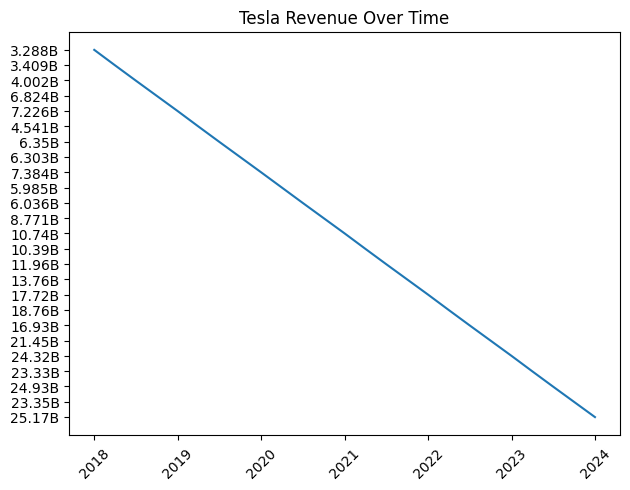

In [10]:
##ayuna, no me funciona
import matplotlib.pyplot as plt

import seaborn as sns

tesla_df['Date'] = pd.to_datetime(tesla_df['Date'])

plt.plot(tesla_df['Date'], tesla_df['Revenue'])
plt.title("Tesla Revenue Over Time")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


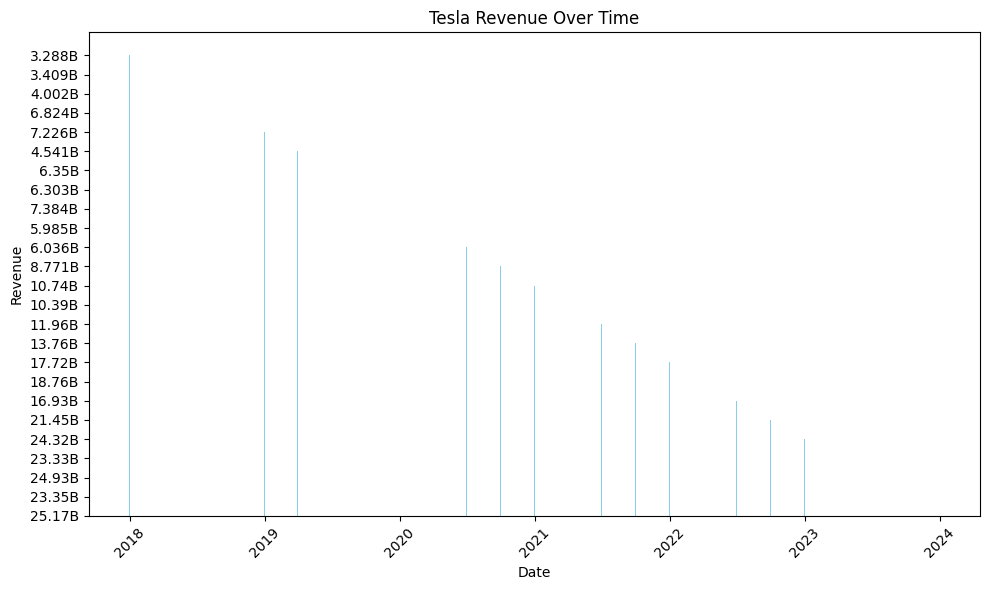

In [12]:
##ayuda, no me funciona 
tesla_df['Date'] = pd.to_datetime(tesla_df['Date'])


plt.figure(figsize=(10, 6))
bar_color = 'steelblue'

plt.bar(tesla_df['Date'], tesla_df['Revenue'], color='skyblue')


plt.title('Tesla Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')


plt.xticks(rotation=45)



plt.tight_layout()
plt.show()
